In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pingouin as pg

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#suppress scientific notation
pd.options.display.float_format = '{:.4f}'.format

In [2]:
os.chdir('C:\\Users\\Sam Cannon\\Desktop\\Python\\SIOP 2020')

__Import the data__

In [3]:
data = pd.read_csv('heather_clean_data.csv')

In [4]:
#drop the "unnamed" columns that appear in the data
data.drop(data.columns[data.columns.str.contains('Unnamed') == True], axis = 1, inplace = True)

## Reverse Score Turnover Items
- I am going to reverse score the turnover items so that they reflect "intent to stay" rather than "intent to leave"

In [5]:
#the max for the turnover items is 5, so I will be just subtracting the item scores from 5
max(data.Turnover_1)

5.0

In [6]:
#reverse score the columns
data.loc[:, 'Turnover_1':'Turnover_3'] = 5 - data.loc[:, 'Turnover_1':'Turnover_3']

In [7]:
#map 0 = Male, 1 = Female, 2 = other onto gender
gender_mapper = {1:0, 2:1, 3:2}
data['Gender'].replace(gender_mapper, inplace = True)

In [8]:
data['Gender'].value_counts()

0.0000    168
1.0000    159
2.0000      5
Name: Gender, dtype: int64

In [9]:
data1 = data.loc[:, 'Learning_1':'Support']
data2 = data.loc[:, 'Belong_1':'Turnover_3']
data3 = data.loc[:, 'MicroInv_1':'Workplace_5']
data4 = data[['Gender', 'Ethnicity']]
df = pd.concat([data1, data2, data3, data4], axis = 1)

In [10]:
df.head(1)

,Learning_1,Learning_2,Learning_3,Learning_4,Learning_5,Learning_6,Learning_7,Learning_8,Learn_1,Learn_2,Support,Belong_1,Belong_2,Belong_3,Belong_4,Belong_5,Belong_6,Belong_7,Belong_8,Auth_1,Auth_2,Auth_3,Auth_4,Auth_5,Auth_6,Auth_7,Auth_8,Turnover_1,Turnover_2,Turnover_3,MicroInv_1,MicroInv_2,MicroInv_3,MicroInv_4,MicroInv_5,MicroInv_6,MicroInv_7,MicroInv_8,MicroInv_9,Workplace_1,Workplace_2,Workplace_3,Workplace_4,Workplace_5,Gender,Ethnicity
0,2.0000,1.0000,2.0000,2.0000,2.0000,2.0000,2.0000,1.0000,6.0000,6.0000,2.0000,4.0000,5.0000,4.0000,4.0000,4.0000,5.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,3.0000,3.0000,3.0000,3.0000,4.0000,4.0000,4.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5


In [11]:
df.shape

(391, 46)

## Breakdown of Gender Size

In [12]:
df.Gender.value_counts()

0.0000    168
1.0000    159
2.0000      5
Name: Gender, dtype: int64

In [13]:
# profile = measure_data.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file="measure_report.html")

## Dropping Missing Values

In [14]:
# Printing the percentage of missing values per column
def percent_missing(dataframe):
    '''
    Prints the percentage of missing values for each column in a dataframe
    '''
    # Summing the number of missing values per column and then dividing by the total
    sumMissing = dataframe.isnull().values.sum(axis=0)
    pctMissing = sumMissing / dataframe.shape[0]
    
    if sumMissing.sum() == 0:
        print('No missing values')
    else:
        # Looping through and printing out each columns missing value percentage
        print('Percent Missing Values:', '\n')
        for idx, col in enumerate(dataframe.columns):
            if sumMissing[idx] > 0:
                print('{0}: {1:.2f}%'.format(col, pctMissing[idx] * 100))

In [15]:
percent_missing(df)
df.shape

Percent Missing Values: 

Learning_1: 15.60%
Learning_2: 15.60%
Learning_3: 16.11%
Learning_4: 15.86%
Learning_5: 17.14%
Learning_6: 15.60%
Learning_7: 15.60%
Learning_8: 15.60%
Learn_1: 15.60%
Learn_2: 15.86%
Support: 15.60%
Belong_1: 16.11%
Belong_2: 16.11%
Belong_3: 16.37%
Belong_4: 17.14%
Belong_5: 16.88%
Belong_6: 17.65%
Belong_7: 16.62%
Belong_8: 16.62%
Auth_1: 16.11%
Auth_2: 16.37%
Auth_3: 16.37%
Auth_4: 16.62%
Auth_5: 16.62%
Auth_6: 16.37%
Auth_7: 16.37%
Auth_8: 16.11%
Turnover_1: 15.35%
Turnover_2: 15.60%
Turnover_3: 15.60%
MicroInv_1: 14.58%
MicroInv_2: 14.58%
MicroInv_3: 14.83%
MicroInv_4: 14.58%
MicroInv_5: 14.58%
MicroInv_6: 14.58%
MicroInv_7: 14.58%
MicroInv_8: 14.83%
MicroInv_9: 14.58%
Workplace_1: 14.32%
Workplace_2: 14.32%
Workplace_3: 14.58%
Workplace_4: 14.58%
Workplace_5: 14.32%
Gender: 15.09%


(391, 46)

In [16]:
#drop NAs
df.dropna(inplace = True)
percent_missing(df)
df.reset_index(drop = True, inplace = True)
df.shape

No missing values


(292, 46)

In [17]:
df.shape

(292, 46)

## How many people felt support?
- 1 = felt support
- 2 = did not

In [18]:
df['Support'].value_counts()

1.0000    211
2.0000     81
Name: Support, dtype: int64

## Ethnic Group Makeup

In [19]:
df.groupby('Ethnicity').size()

Ethnicity
1      4
2     73
3      5
4     51
5     65
6      4
7     50
8      7
9     30
10     2
11     1
dtype: int64

## Calculating Mean, Standard Deviation for Each Group

In [20]:
#mean, std for learning_1 through Learn_2
df['learning_mean'] = df.loc[:, 'Learning_1':'Learn_2'].mean(axis = 1)
df['learning_std'] = round(df.loc[:, 'Learning_1':'Learn_2'].std(axis = 1), 3)

#mean, std for Turnover_1 through Turnover_3
df['turnover_mean'] = df.loc[:, 'Turnover_1':'Turnover_3'].mean(axis = 1)
df['turnover_std'] = round(df.loc[:, 'Turnover_1':'Turnover_3'].std(axis = 1), 3)

#mean, std for Authenticity and Belonging questions
df['inclusion_mean'] = df.loc[:, 'Belong_1':'Auth_8'].mean(axis = 1)
df['inclusion_std'] = round(df.loc[:, 'Belong_1':'Auth_8'].std(axis = 1), 3)

#get count, std for MicroInv - Workplace 
df['micro_std'] = round(df.loc[:, 'MicroInv_1':'Workplace_5'].std(axis = 1), 3)
#now getting count
mapper = {2.0:0.0} #create mapper to replace 2s with 0s
df['micro_count'] = df.loc[:, 'MicroInv_1':'Workplace_5'].replace(mapper).sum(axis = 1) #replace values = 2 with 0 so that our count is only for 1s in the rows

In [22]:
#send to csv
df.to_csv('AOM_data_clean.csv')

In [23]:
df.head()

,Learning_1,Learning_2,Learning_3,Learning_4,Learning_5,Learning_6,Learning_7,Learning_8,Learn_1,Learn_2,Support,Belong_1,Belong_2,Belong_3,Belong_4,Belong_5,Belong_6,Belong_7,Belong_8,Auth_1,Auth_2,Auth_3,Auth_4,Auth_5,Auth_6,Auth_7,Auth_8,Turnover_1,Turnover_2,Turnover_3,MicroInv_1,MicroInv_2,MicroInv_3,MicroInv_4,MicroInv_5,MicroInv_6,MicroInv_7,MicroInv_8,MicroInv_9,Workplace_1,Workplace_2,Workplace_3,Workplace_4,Workplace_5,Gender,Ethnicity,learning_mean,learning_std,turnover_mean,turnover_std,inclusion_mean,inclusion_std,micro_std,micro_count
0,2.0000,1.0000,2.0000,2.0000,2.0000,2.0000,2.0000,1.0000,6.0000,6.0000,2.0000,4.0000,5.0000,4.0000,4.0000,4.0000,5.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,3.0000,3.0000,3.0000,3.0000,4.0000,4.0000,4.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5,2.6000,1.8380,4.0000,0.0000,3.8750,0.6190,0.0000,14.0000
1,3.0000,2.0000,2.0000,3.0000,3.0000,3.0000,3.0000,3.0000,2.0000,2.0000,1.0000,3.0000,2.0000,2.0000,2.0000,3.0000,2.0000,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000,2.0000,2.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,2.0000,2.0000,2.0000,1.0000,2.0000,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,3,2.6000,0.5160,0.0000,0.0000,1.8125,0.6550,0.5140,6.0000
2,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,5.0000,5.0000,1.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,2.0000,3.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,4,4.2000,0.4220,3.0000,1.0000,4.5000,0.5160,0.0000,14.0000
3,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,1.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,3.0000,3.0000,3.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,4,4.0000,0.0000,3.0000,0.0000,4.0000,0.0000,0.0000,14.0000
4,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,6.0000,6.0000,1.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,3.0000,3.0000,3.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,9,3.6000,1.2650,3.0000,0.0000,4.5000,0.5160,0.0000,14.0000


## Correlation Matrix for Means and Standard Deviations

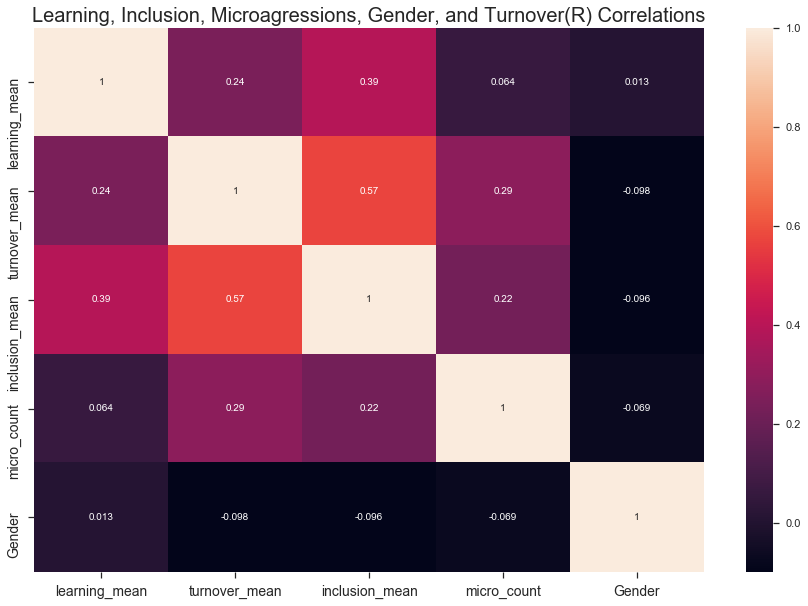

In [24]:
corr_data = df[['learning_mean', 'turnover_mean', 'inclusion_mean', 'micro_count', 'Gender']]

#plot the heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(corr_data.corr(), annot = True)
plt.title('Learning, Inclusion, Microagressions, Gender, and Turnover(R) Correlations', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

__Correlations with p-values and corrections, bonferroni stepdown adjustments__

In [25]:
pg.pairwise_corr(corr_data, columns=['Gender', 'inclusion_mean', 'turnover_mean', 'micro_count', 'learning_mean'])

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Gender,inclusion_mean,pearson,two-sided,292,-0.0960,"[-0.21, 0.02]",0.0090,0.0020,-0.0960,0.1016,0.278,0.3740
1,Gender,turnover_mean,pearson,two-sided,292,-0.0980,"[-0.21, 0.02]",0.0100,0.0030,-0.0980,0.0939,0.296,0.3890
2,Gender,micro_count,pearson,two-sided,292,-0.0690,"[-0.18, 0.05]",0.0050,-0.0020,-0.0690,0.2400,0.146,0.2170
3,Gender,learning_mean,pearson,two-sided,292,0.0130,"[-0.1, 0.13]",0.0000,-0.0070,0.0130,0.8290,0.075,0.0550
4,inclusion_mean,turnover_mean,pearson,two-sided,292,0.5740,"[0.49, 0.65]",0.3300,0.3250,0.6530,0.0000,7.518e+23,1.0000
5,inclusion_mean,micro_count,pearson,two-sided,292,0.2250,"[0.11, 0.33]",0.0510,0.0440,0.2290,0.0001,129.795,0.9740
6,inclusion_mean,learning_mean,pearson,two-sided,292,0.3940,"[0.29, 0.49]",0.1550,0.1490,0.4170,0.0000,2.514e+09,1.0000
7,turnover_mean,micro_count,pearson,two-sided,292,0.2890,"[0.18, 0.39]",0.0840,0.0770,0.2970,0.0000,2.1e+04,0.9990
8,turnover_mean,learning_mean,pearson,two-sided,292,0.2440,"[0.13, 0.35]",0.0600,0.0530,0.2490,0.0000,510.433,0.9890
9,micro_count,learning_mean,pearson,two-sided,292,0.0640,"[-0.05, 0.18]",0.0040,-0.0030,0.0640,0.2765,0.132,0.1930


## Create Composite of "Learn" and "Learning" Items and Correlate them

In [26]:
learning_items = df.loc[:,'Learning_1':'Learning_8']
learning_items['learning_composite'] = learning_items.mean(axis = 1)

learn_items = df.loc[:, 'Learn_1':'Learn_2']
learn_items['learn_composite'] = learn_items.mean(axis = 1)

learning_df = pd.concat([learning_items,learn_items], axis = 1)

#correlate the composites
pg.corr(learning_df['learning_composite'], learning_df['learn_composite'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,292,0.2640,"[0.15, 0.37]",0.0700,0.0640,0.0000,2510.484,0.9960


## How do 'learn' and 'learning' composite scores correlate with everything else?

In [27]:
new_corr_data = pd.concat([corr_data, learning_df], axis = 1)[['turnover_mean', 'inclusion_mean', 'micro_count', 'learning_composite', 'learn_composite', 'Gender']]
pg.pairwise_corr(new_corr_data)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,turnover_mean,inclusion_mean,pearson,two-sided,292,0.5740,"[0.49, 0.65]",0.3300,0.3250,0.6530,0.0000,7.518e+23,1.0000
1,turnover_mean,micro_count,pearson,two-sided,292,0.2890,"[0.18, 0.39]",0.0840,0.0770,0.2970,0.0000,2.1e+04,0.9990
2,turnover_mean,learning_composite,pearson,two-sided,292,0.1790,"[0.07, 0.29]",0.0320,0.0260,0.1810,0.0021,8.172,0.8710
3,turnover_mean,learn_composite,pearson,two-sided,292,0.2710,"[0.16, 0.37]",0.0730,0.0670,0.2780,0.0000,4312.388,0.9970
4,turnover_mean,Gender,pearson,two-sided,292,-0.0980,"[-0.21, 0.02]",0.0100,0.0030,-0.0980,0.0939,0.296,0.3890
5,inclusion_mean,micro_count,pearson,two-sided,292,0.2250,"[0.11, 0.33]",0.0510,0.0440,0.2290,0.0001,129.795,0.9740
6,inclusion_mean,learning_composite,pearson,two-sided,292,0.3120,"[0.2, 0.41]",0.0970,0.0910,0.3230,0.0000,1.86e+05,1.0000
7,inclusion_mean,learn_composite,pearson,two-sided,292,0.3790,"[0.28, 0.47]",0.1430,0.1370,0.3990,0.0000,3.458e+08,1.0000
8,inclusion_mean,Gender,pearson,two-sided,292,-0.0960,"[-0.21, 0.02]",0.0090,0.0020,-0.0960,0.1016,0.278,0.3740
9,micro_count,learning_composite,pearson,two-sided,292,-0.0350,"[-0.15, 0.08]",0.0010,-0.0060,-0.0350,0.5519,0.087,0.0910


## Getting Cronbach's Alpha for Learning, Belonging+Authenticity, and Turnover

In [28]:
#get chronbachs alpha for subsets of measures
def cronbach_alpha(items):
    items = pd.DataFrame(items)
    items_count = items.shape[1]
    variance_sum = float(items.var(axis=0, ddof=1).sum())
    total_var = float(items.sum(axis=1).var(ddof=1))
    
    return (items_count / float(items_count - 1) *
            (1 - variance_sum / total_var))

In [29]:
#get alpha for "learning" variables
learning_alpha = cronbach_alpha(df.loc[:, 'Learning_1':'Learn_2'])
print(f"Cronbach's Alpha for Learning: {learning_alpha}")

print('  ')

#get alpha for "Turnover"
turnover_alpha = cronbach_alpha(df.loc[:, 'Turnover_1':'Turnover_3'])
print(f"Cronbach's Alpha for Turnover: {turnover_alpha}")

print('   ')

#get alpha for belonging and authenticity
belonging_alpha = cronbach_alpha(df.loc[:, 'Belong_1':'Auth_8'])
print(f"Cronbach's Alpha for Belonging and Authenticity: {belonging_alpha}")

Cronbach's Alpha for Learning: 0.9183583300530999
  
Cronbach's Alpha for Turnover: 0.913896190132657
   
Cronbach's Alpha for Belonging and Authenticity: 0.9756246689250677


# Begin Factor Analysis

In [30]:
#using bartlett test to confirm that we should use a factor analysis, 0 p value indicates we should
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer
features = df.loc[:, 'Learning_1':'Learn_2']

chi_square_value,p_value=calculate_bartlett_sphericity(features)
chi_square_value, p_value

(3198.205033084083, 0.0)

In [31]:
#KMO test, values above 60 are great and indicate that the data is stable enough for a factor analysis
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(features)
kmo_model

0.897048521711588

## Getting Eigenvalues

In [32]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(features, 10, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,6.6024
1,1.7153
2,0.4753
3,0.3123
4,0.2159
5,0.1969
6,0.1488
7,0.1202
8,0.1157
9,0.0972


## Scree Plot
- We can see from the scree plot that there are only two factors who's eigenvalues are above 1, thus 2 factors are explaining most of the variance in the data, so 2 factors makes sense
- we could have also just used the eigenvalue table above, but its more fun to see it plotted out

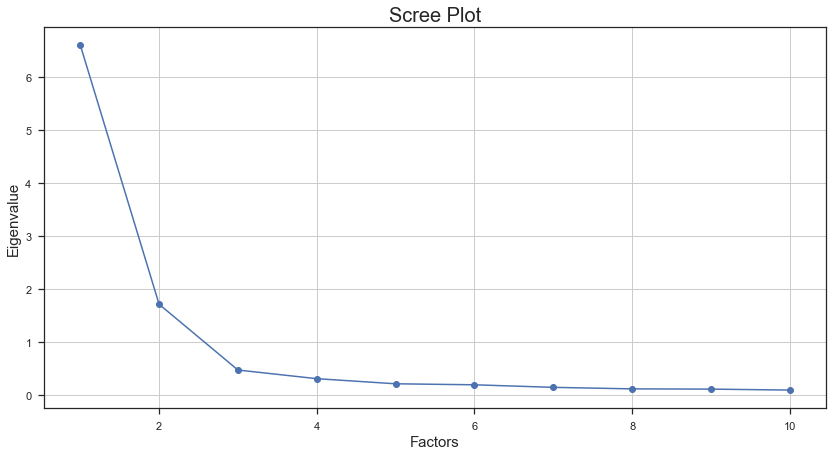

In [30]:
# Create scree plot using matplotlib
plt.figure(figsize = (14, 7))
plt.scatter(range(1,features.shape[1]+1),ev)
plt.plot(range(1,features.shape[1]+1),ev)
plt.title('Scree Plot', fontsize = 20)
plt.xlabel('Factors', fontsize = 15)
plt.ylabel('Eigenvalue', fontsize = 15)
plt.grid()
plt.show()

## Factor Analysis with 2 Factors
- using Maximum Likelihood and a promax rotation (since factors will be correlated with each other theoretically)

In [33]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(features, 2, method = 'ml', rotation = 'promax')
fa.loadings

,Factor1,Factor2
Learning_1,0.0033,0.8393
Learning_2,0.0469,0.8782
Learning_3,0.0280,0.8908
Learning_4,0.0365,0.8645
Learning_5,0.0127,0.8615
Learning_6,-0.0271,0.9140
Learning_7,-0.0440,0.9102
Learning_8,-0.0481,0.8783
Learn_1,0.9981,-0.0022
Learn_2,0.8877,-0.0009


In [34]:
composite_df = df[['turnover_mean', 'inclusion_mean', 'learning_mean', 'micro_count']]

In [35]:
composite_df.head()

,turnover_mean,inclusion_mean,learning_mean,micro_count
0,4.0000,3.8750,2.6000,14.0000
1,0.0000,1.8125,2.6000,6.0000
2,3.0000,4.5000,4.2000,14.0000
3,3.0000,4.0000,4.0000,14.0000
4,3.0000,4.5000,3.6000,14.0000


## Run Mediation
- using pingouin to conduct mediation analysis
- Regressing inclusion on learning for "a" path
- Regressing turnover on learning + inclusion for "b" path
    - B weight in the output is "c" path
- Running a mediation analysis with the IV (learning), Mediator (inclusion), and DV (turnover)

In [43]:
#Baron and Kenny Method.
#First, regress inclusion on learning to obtain a path.
pg.linear_regression(composite_df['learning_mean'], composite_df['inclusion_mean'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.7257,0.1551,17.5728,0.0000,0.1550,0.1521,2.4204,3.0310
1,learning_mean,0.3703,0.0508,7.2942,0.0000,0.1550,0.1521,0.2704,0.4702


In [44]:
#Next, obtain c path by regressing turnover on learning and inclusion
pg.linear_regression(composite_df[['learning_mean', 'inclusion_mean']], composite_df['turnover_mean'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-1.2003,0.2966,-4.0473,0.0001,0.3300,0.3254,-1.7840,-0.6166
1,learning_mean,0.0300,0.0735,0.4083,0.6834,0.3300,0.3254,-0.1146,0.1746
2,inclusion_mean,0.8439,0.0781,10.7998,0.0000,0.3300,0.3254,0.6901,0.9976


__Indirect effect is significant__

In [36]:
# https://github.com/raphaelvallat/pingouin
# Conduct bootsrapping procedure to determine significance of indirect effect
# (apath * bpath).
pg.mediation_analysis(data=composite_df, x = 'learning_mean', m = 'inclusion_mean', y = 'turnover_mean', seed=42, n_boot=5000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,inclusion_mean ~ X,0.3703,0.0508,0.0000,0.2704,0.4702,Yes
1,Y ~ inclusion_mean,0.8564,0.0717,0.0000,0.7153,0.9976,Yes
2,Total,0.3425,0.0799,0.0000,0.1852,0.4997,Yes
3,Direct,0.0300,0.0735,0.6834,-0.1146,0.1746,No
4,Indirect,0.3125,0.0492,0.0000,0.2195,0.4128,Yes


## Run mediation on Learn and Learning variables separately

In [39]:
#concatening the learn and learning composites separated out with the composite df
composite_df = pd.concat([composite_df, learning_df[['learning_composite', 'learn_composite']]], axis = 1)

In [40]:
#send this to csv
learn_learning_separated = composite_df.drop('learning_mean', axis = 1)
learn_learning_separated.to_csv('learn_learning_separated_composite_df.csv')

In [46]:
import pingouin as pg

__Mediation for Learning__

In [61]:
pg.mediation_analysis(data = composite_df, x = 'learning_composite', m = 'inclusion_mean', y = 'turnover_mean', seed = 43, n_boot = 5000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,inclusion_mean ~ X,0.2730,0.0488,0.0000,0.1769,0.3690,Yes
1,Y ~ inclusion_mean,0.8564,0.0717,0.0000,0.7153,0.9976,Yes
2,Total,0.2342,0.0754,0.0021,0.0858,0.3826,Yes
3,Direct,0.0005,0.0662,0.9940,-0.1297,0.1307,No
4,Indirect,0.2337,0.0432,0.0000,0.1504,0.3208,Yes


In [49]:
#columns were copied for some reason
composite_df = composite_df.iloc[:, 0:6]

__Mediation for learn__

In [62]:
pg.mediation_analysis(data = composite_df, x = 'learn_composite', m = 'inclusion_mean', y = 'turnover_mean', seed = 44, n_boot = 5000)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,inclusion_mean ~ X,0.2148,0.0308,0.0000,0.1541,0.2755,Yes
1,Y ~ inclusion_mean,0.8564,0.0717,0.0000,0.7153,0.9976,Yes
2,Total,0.2294,0.0479,0.0000,0.1352,0.3236,Yes
3,Direct,0.0530,0.0439,0.2287,-0.0335,0.1395,No
4,Indirect,0.1764,0.0311,0.0000,0.1206,0.2431,Yes


# Running a Regression on Turnover and Inclusion separately, with both Learning and Learn separated out

__Start with learning__

In [54]:
#regressing inclusion on learn and learning
pg.linear_regression(composite_df[['learning_composite']], composite_df['inclusion_mean'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,3.0757,0.1389,22.1381,0.0000,0.0973,0.0942,2.8023,3.3492
1,learning_composite,0.2730,0.0488,5.5919,0.0000,0.0973,0.0942,0.1769,0.3690


In [63]:
#regressing turnover on learn and learning
pg.linear_regression(composite_df[['learning_composite', 'inclusion_mean']], composite_df['turnover_mean'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-1.1617,0.2934,-3.9590,0.0001,0.3296,0.3250,-1.7393,-0.5842
1,learning_composite,0.0005,0.0662,0.0075,0.9940,0.3296,0.3250,-0.1297,0.1307
2,inclusion_mean,0.8562,0.0756,11.3230,0.0000,0.3296,0.3250,0.7074,1.0051


__Now for learn__

In [59]:
#regressing inclusion on learn and learning
pg.linear_regression(composite_df[['learn_composite']], composite_df['inclusion_mean'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.9625,0.1299,22.8105,0.0000,0.1433,0.1403,2.7069,3.2181
1,learn_composite,0.2148,0.0308,6.9649,0.0000,0.1433,0.1403,0.1541,0.2755


In [60]:
#regressing turnover on learn and learning
pg.linear_regression(composite_df[['learn_composite', 'inclusion_mean']], composite_df['turnover_mean'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-1.2332,0.2862,-4.3080,0.0000,0.3330,0.3284,-1.7965,-0.6698
1,learn_composite,0.0530,0.0439,1.2062,0.2287,0.3330,0.3284,-0.0335,0.1395
2,inclusion_mean,0.8211,0.0774,10.6043,0.0000,0.3330,0.3284,0.6687,0.9735
